# Predicting the next decisions with tones

In [2]:
%config InlineBackend.figure_format='retina'
import logging
import warnings
from ekorpkit import eKonf

logging.basicConfig(level=logging.WARNING)
warnings.filterwarnings('ignore')
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("evironment varialbles:")
eKonf.print(eKonf.env().dict())

version: 0.1.33+28.g90d1dea
is notebook? True
is colab? False
evironment varialbles:
{'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'NUM_WORKERS': 230}


In [3]:
data_dir = "../data/fomc"

## Auto ML with LM tones

In [4]:
fs_cfg = eKonf.compose(config_group="dataset=feature")
fs_cfg.name = "fomc_tone_features_lm"
fs_cfg.data_dir = data_dir

model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.name = 'fomc_tone_lm'
model_cfg.dataset = fs_cfg
model_cfg.config.time_budget = 1000
model_cfg.verbose = False
model_lm = eKonf.instantiate(model_cfg)

In [5]:
model_lm.fit()

INFO:flaml.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


Best ML leaner: extra_tree
Best hyperparmeter config: {'n_estimators': 5, 'max_features': 0.2532691256970419, 'max_leaves': 14, 'criterion': 'entropy'}
Best accuracy on validation data: 0.7468
Training duration of best run: 0.1283 s


In [6]:
model_lm.best_estimator

ExtraTreesClassifier(criterion='entropy', max_features=0.2532691256970419,
                     max_leaf_nodes=14, n_estimators=5, n_jobs=-1)

In [7]:
model_lm.save()

In [8]:
model_lm.load()

In [11]:
model_lm.show_results()

Best ML leaner: extra_tree
Best hyperparmeter config: {'n_estimators': 5, 'max_features': 0.2532691256970419, 'max_leaves': 14, 'criterion': 'entropy'}
Best accuracy on validation data: 0.7468
Training duration of best run: 0.1283 s


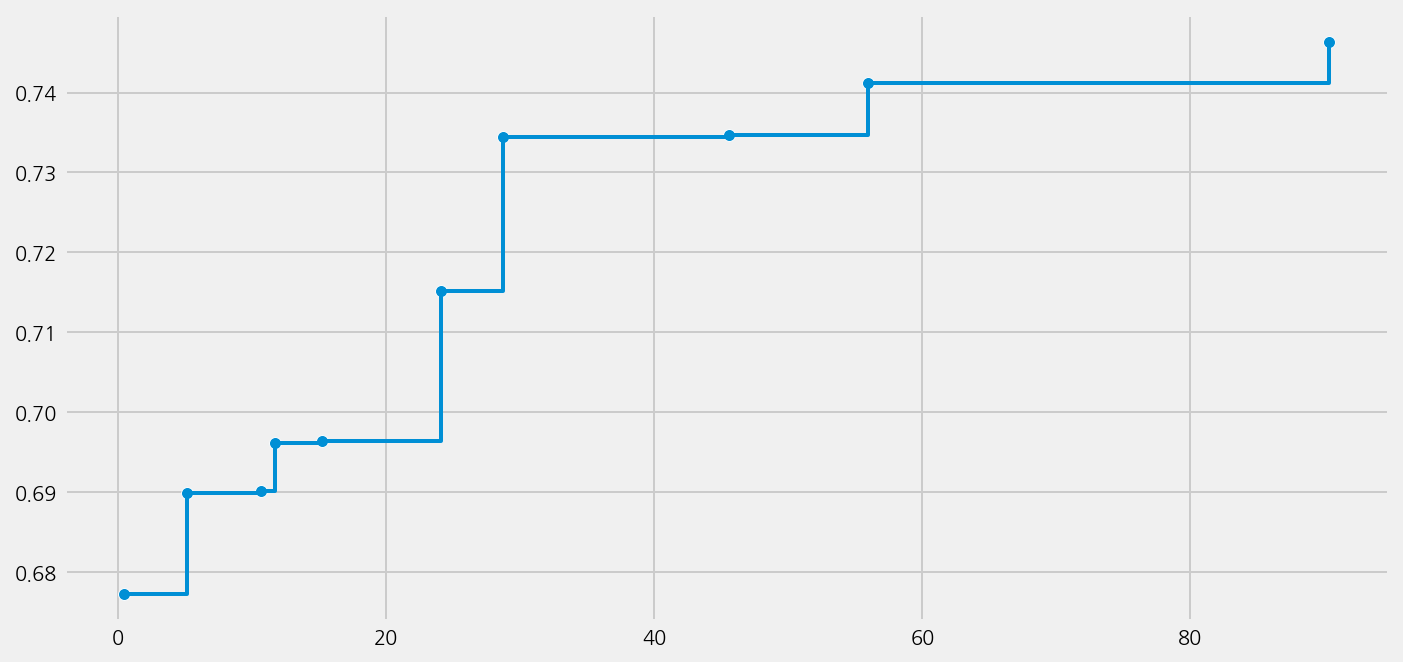

In [12]:
model_lm.plot_learning_curve()

r2: -0.18417874396135314
mse: 0.6981132075471698
mae: 0.4339622641509434
Accuracy:  0.6981132075471698
Precison:  0.6084905660377359
Recall:  0.6981132075471698
F1 Score:  0.6282396848434585
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         Cut       0.75      0.33      0.46         9
        Hike       0.00      0.00      0.00         8
        Hold       0.71      0.94      0.81        36

    accuracy                           0.70        53
   macro avg       0.49      0.43      0.42        53
weighted avg       0.61      0.70      0.63        53



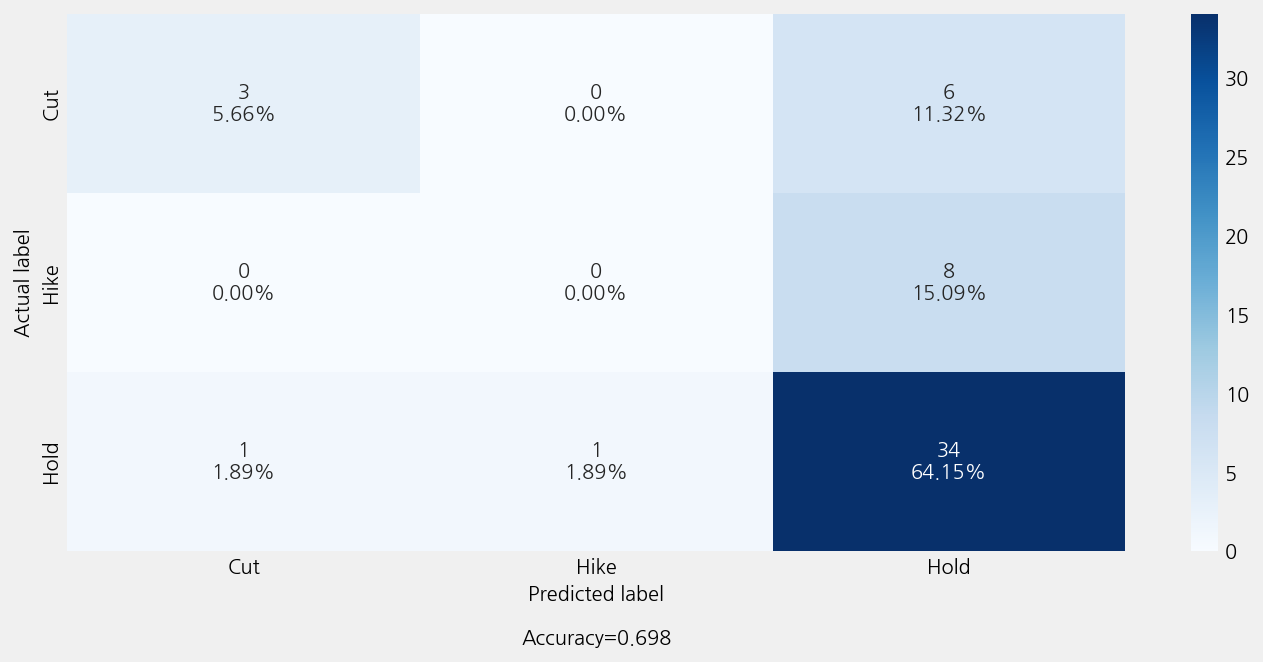

In [13]:
model_lm.eval()

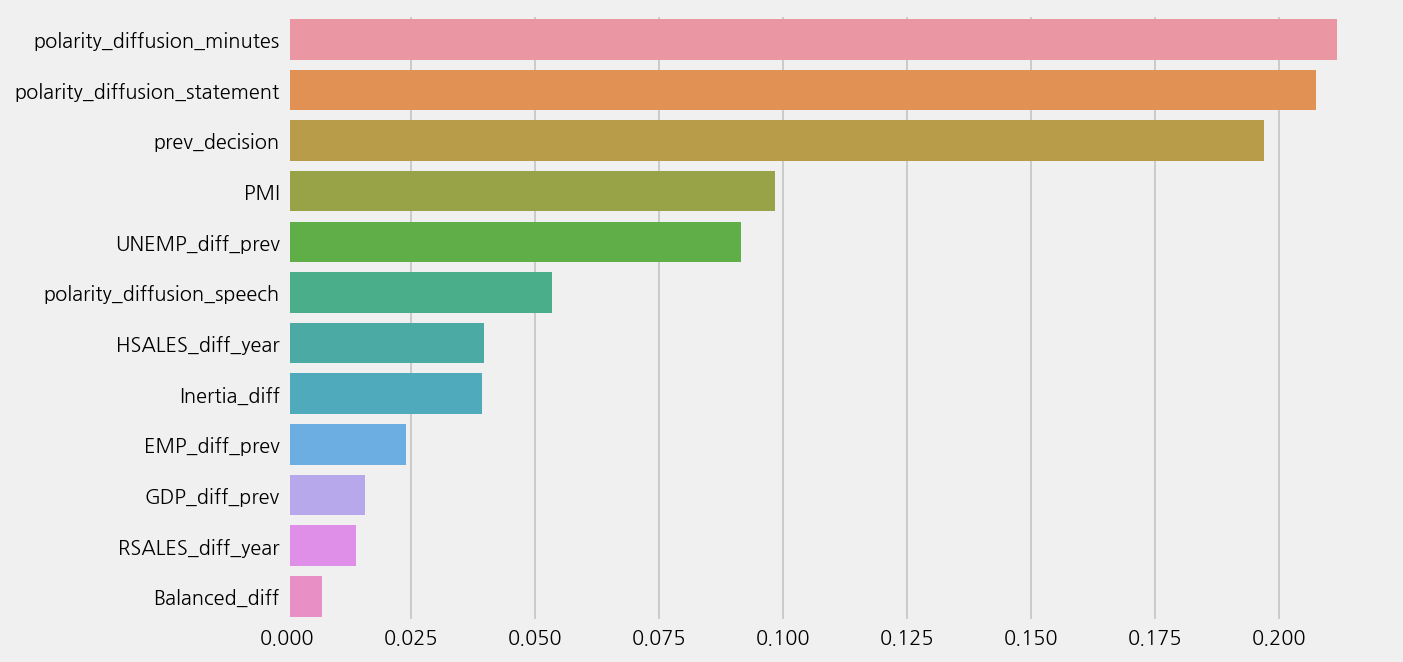

In [14]:
model_lm.plot_feature_importance()

## Auto ML with finbert tones

In [15]:
fs_cfg = eKonf.compose(config_group="dataset=feature")
fs_cfg.name = "fomc_tone_features_finbert"
fs_cfg.data_dir = data_dir

model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.name = 'fomc_tone_finbert'
model_cfg.dataset = fs_cfg
model_cfg.config.time_budget = 1000
model_cfg.verbose = False
model_finbert = eKonf.instantiate(model_cfg)

In [16]:
model_finbert.fit()
model_finbert.save()

INFO:flaml.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 10, 'max_leaves': 9, 'max_features': 0.9429422459795745, 'criterion': 'gini'}
Best accuracy on validation data: 0.7476
Training duration of best run: 0.135 s


Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 10, 'max_leaves': 9, 'max_features': 0.9429422459795745, 'criterion': 'gini'}
Best accuracy on validation data: 0.7476
Training duration of best run: 0.135 s


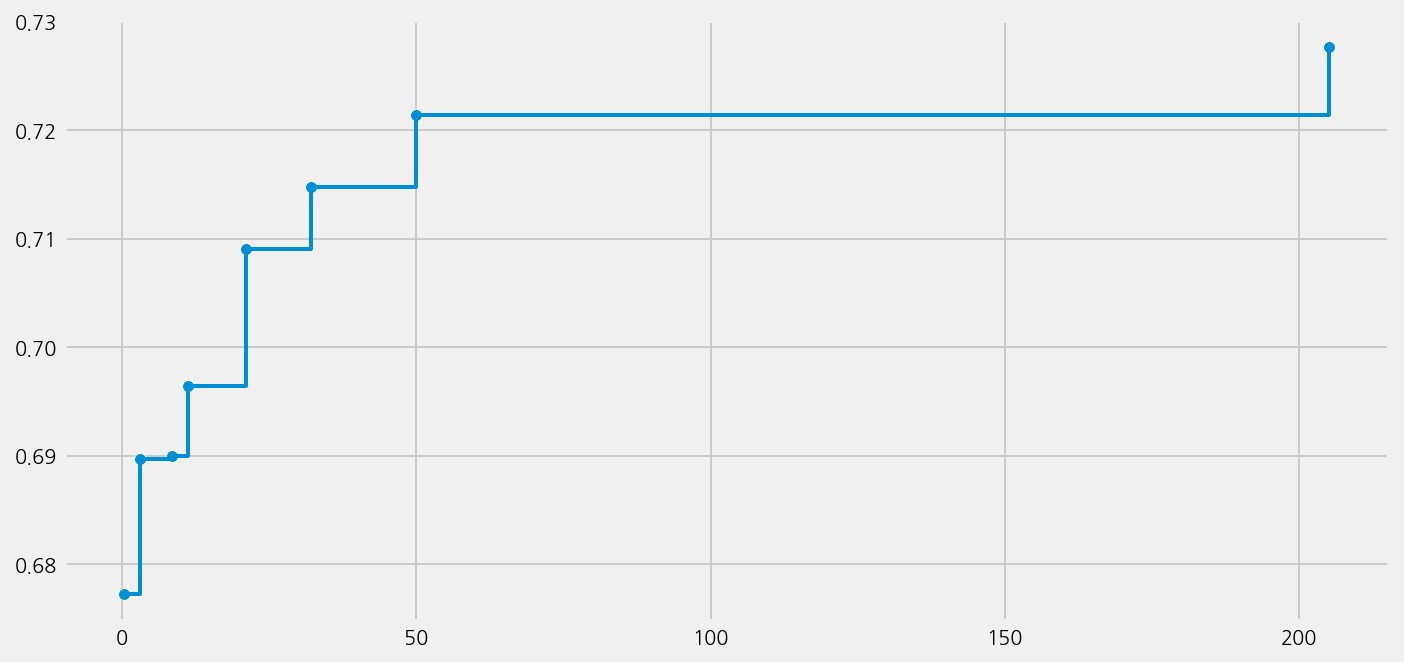

In [17]:
model_finbert.show_results()
model_finbert.plot_learning_curve()

r2: 0.03985507246376774
mse: 0.5660377358490566
mae: 0.33962264150943394
Accuracy:  0.7735849056603774
Precison:  0.7739279588336192
Recall:  0.7735849056603774
F1 Score:  0.7498652291105121
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         Cut       0.80      0.44      0.57         9
        Hike       0.75      0.38      0.50         8
        Hold       0.77      0.94      0.85        36

    accuracy                           0.77        53
   macro avg       0.77      0.59      0.64        53
weighted avg       0.77      0.77      0.75        53



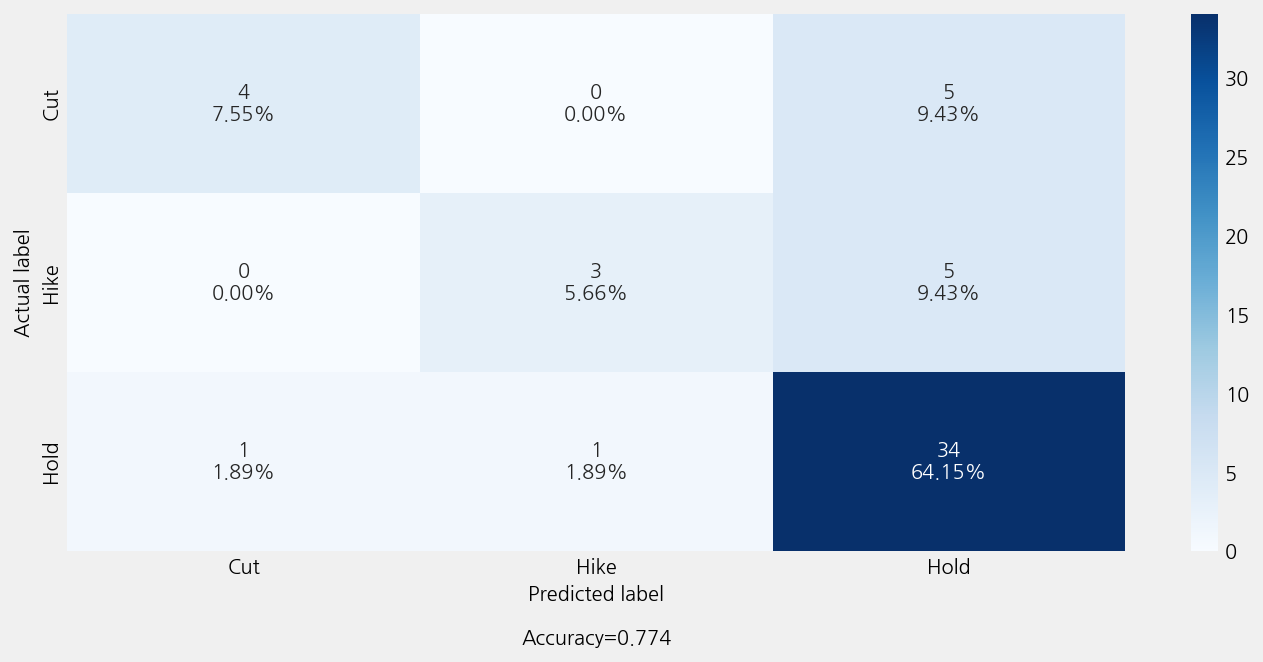

In [18]:
model_finbert.eval()

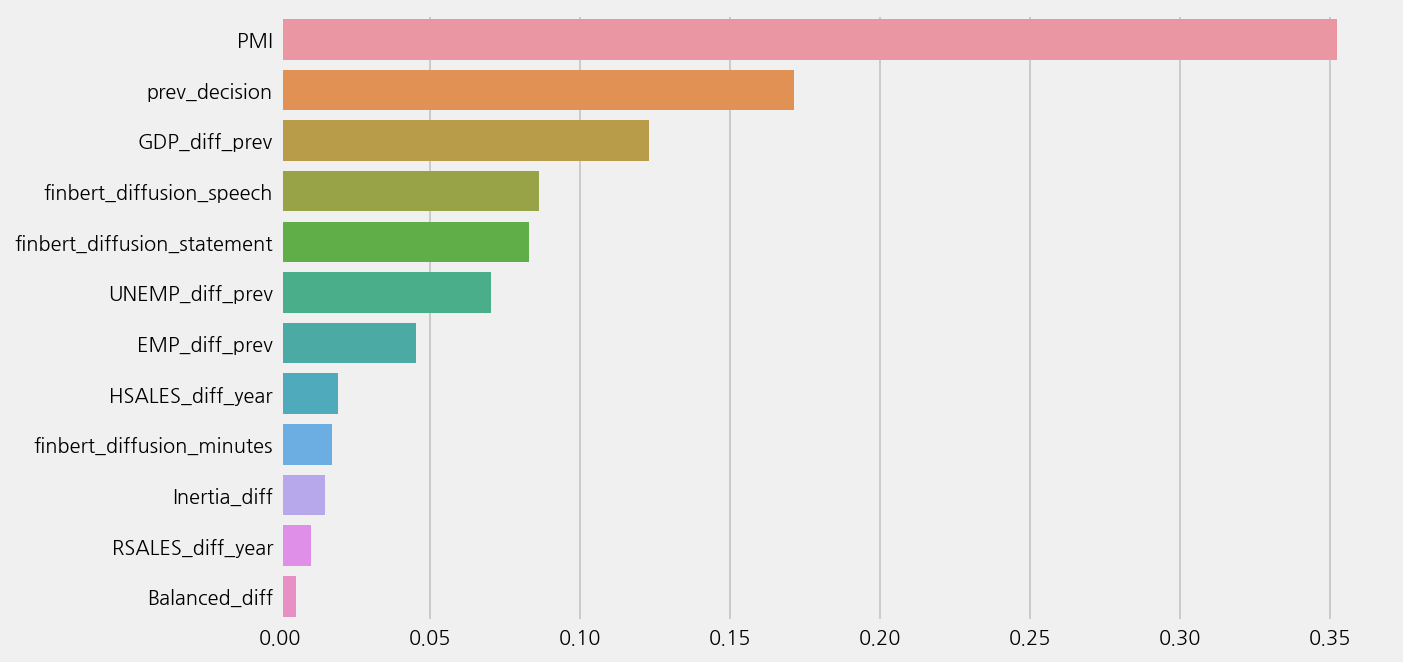

In [19]:
model_finbert.plot_feature_importance()

## Auto ML with T5 tones

In [20]:
fs_cfg = eKonf.compose(config_group="dataset=feature")
fs_cfg.name = "fomc_tone_features_t5"
fs_cfg.data_dir = data_dir

model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.name = 'fomc_tone_t5'
model_cfg.dataset = fs_cfg
model_cfg.config.time_budget = 1000
model_cfg.verbose = False
model_t5 = eKonf.instantiate(model_cfg)

In [21]:
model_t5.fit()
model_t5.save()

INFO:flaml.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 16, 'max_leaves': 10, 'max_features': 0.5150952164927245, 'criterion': 'gini'}
Best accuracy on validation data: 0.7218
Training duration of best run: 0.3864 s


Best ML leaner: rf
Best hyperparmeter config: {'n_estimators': 16, 'max_leaves': 10, 'max_features': 0.5150952164927245, 'criterion': 'gini'}
Best accuracy on validation data: 0.7218
Training duration of best run: 0.3864 s


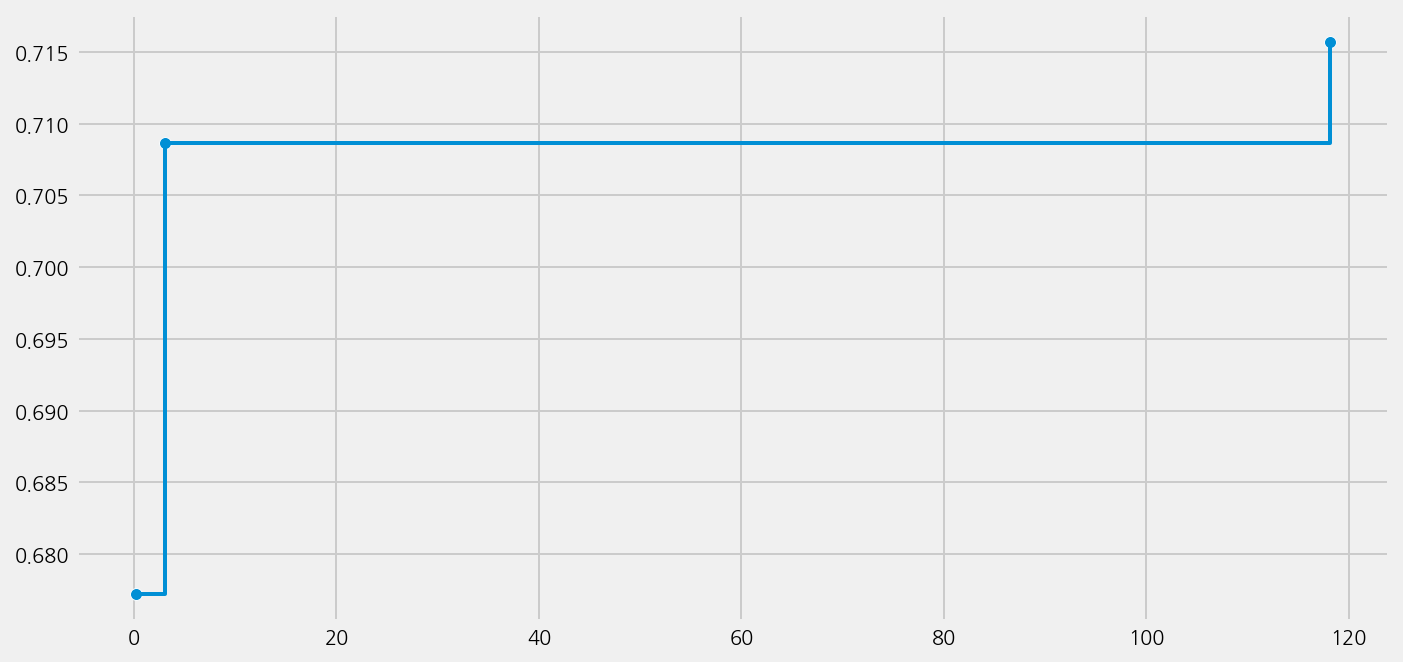

In [22]:
model_t5.show_results()
model_t5.plot_learning_curve()

r2: -0.4082125603864739
mse: 0.8301886792452831
mae: 0.49056603773584906
Accuracy:  0.6792452830188679
Precison:  0.6433962264150944
Recall:  0.6792452830188679
F1 Score:  0.6348008385744235
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         Cut       0.50      0.33      0.40         9
        Hike       0.50      0.12      0.20         8
        Hold       0.71      0.89      0.79        36

    accuracy                           0.68        53
   macro avg       0.57      0.45      0.46        53
weighted avg       0.64      0.68      0.63        53



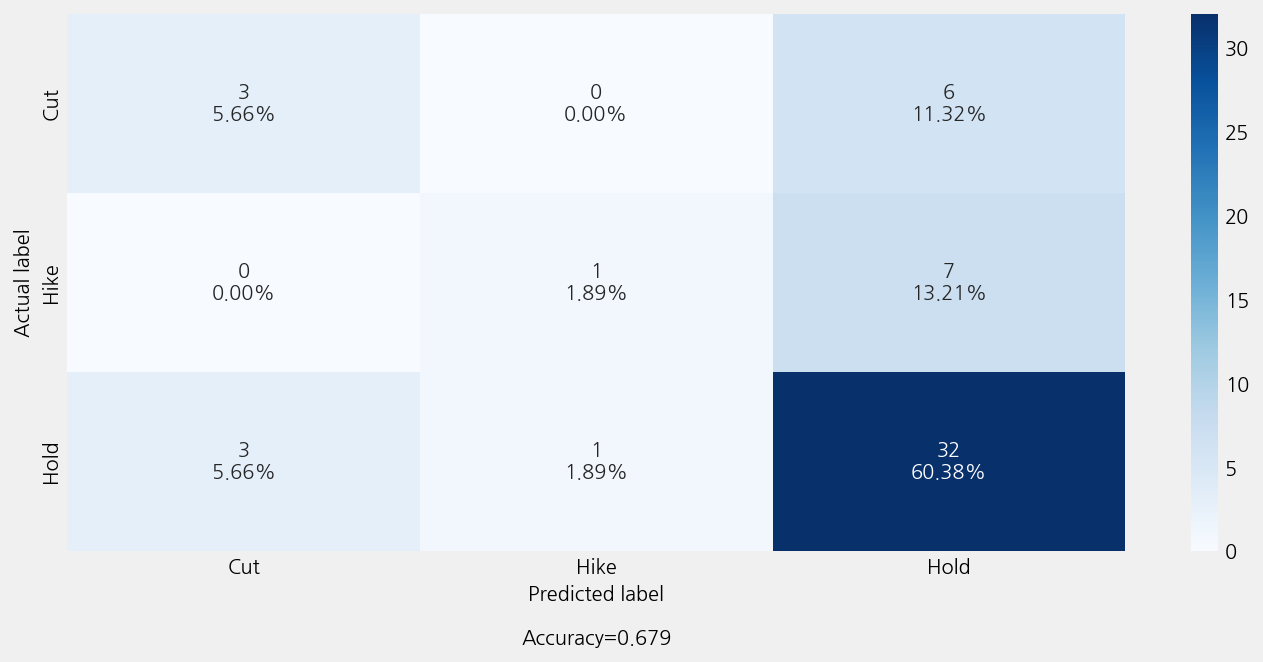

In [23]:
model_t5.eval()

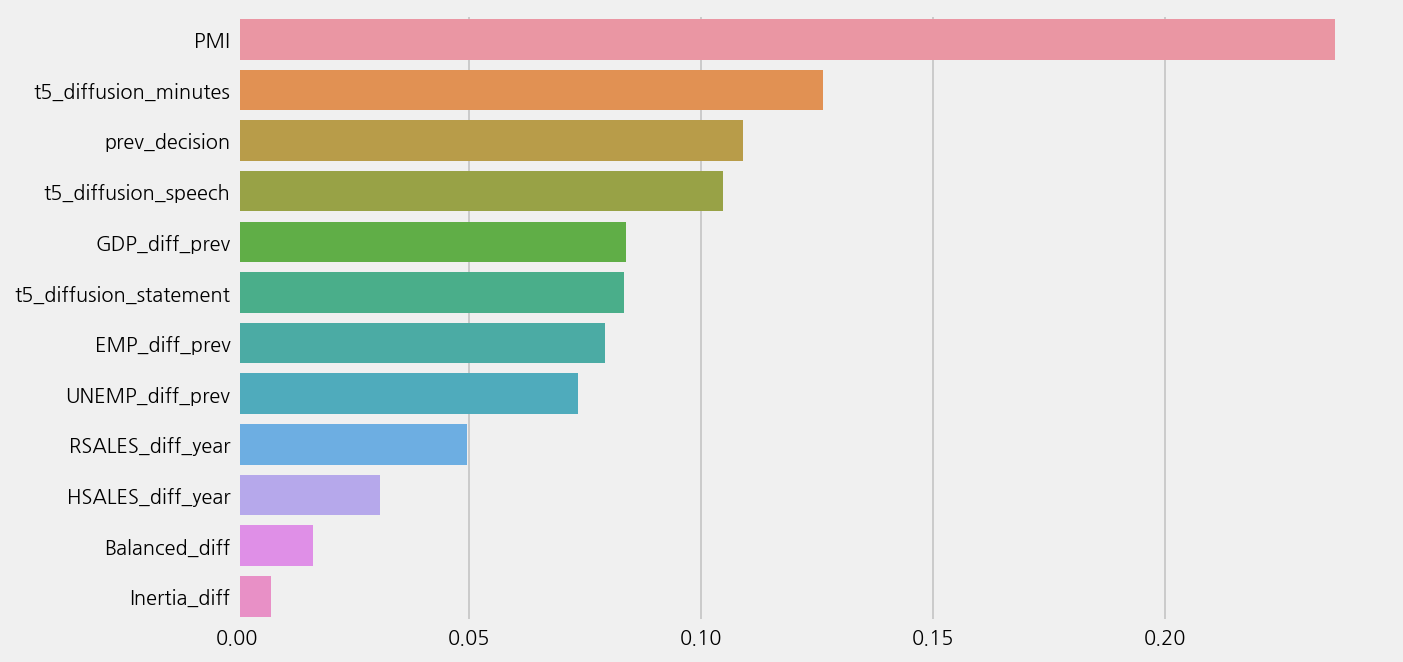

In [24]:
model_t5.plot_feature_importance()